In [1]:
#1. Persiapan Data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Baca data dari file Excel
df = pd.read_excel('C:\\Users\\elmoe\\Desktop\\decision tree\\decision making\\data\\panjang.xlsx')

# Tampilkan beberapa baris terakhir dari DataFrame untuk memahami strukturnya
print(df.tail())

# Pisahkan fitur dan target
X = df.drop('warning_level', axis=1)
y = df['warning_level']

# Identifikasi kolom kategorikal
categorical_cols = X.select_dtypes(include=['object']).columns

# Konversi kolom kategorikal menjadi numerik menggunakan LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    scenario direction  dip  thickness  length        width  volume  \
155    sc156      west    9         79    2921  1256.722381    0.29   
156    sc157      west    9         51    1534  3834.649896    0.30   
157    sc158      west    9         47    2385  2765.511397    0.31   
158    sc159      west    9         52    3500  1758.241758    0.32   
159    sc160      west    9        106    3727   835.311926    0.33   

     highest_panjang  timehighest_panjang  warning_level  
155          0.16150            76.651001  Minor Tsunami  
156          0.21862            76.798380  Minor Tsunami  
157          0.14606           100.850724  Minor Tsunami  
158          0.10800            76.695215  Minor Tsunami  
159          0.15282            76.636263  Minor Tsunami  


In [2]:
#2. Pelatihan Model

from sklearn.tree import DecisionTreeClassifier

# Inisialisasi dan latih DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [3]:
#3. Evaluasi Model

from sklearn.metrics import classification_report, confusion_matrix

# Buat prediksi
y_pred = clf.predict(X_test)

# Tampilkan classification report dan confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

               precision    recall  f1-score   support

Minor Tsunami       1.00      0.97      0.98        29
   No Warning       1.00      1.00      1.00        15
      Tsunami       0.80      1.00      0.89         4

     accuracy                           0.98        48
    macro avg       0.93      0.99      0.96        48
 weighted avg       0.98      0.98      0.98        48

[[28  0  1]
 [ 0 15  0]
 [ 0  0  4]]


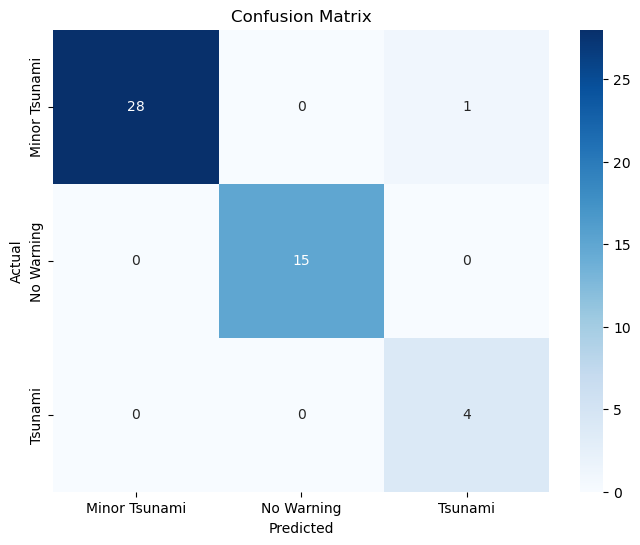

In [4]:
#4. Visualisasi Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Simpan gambar
plt.savefig('confusion_matrix.png')  # Menyimpan gambar dengan nama 'confusion_matrix.png'

plt.show()

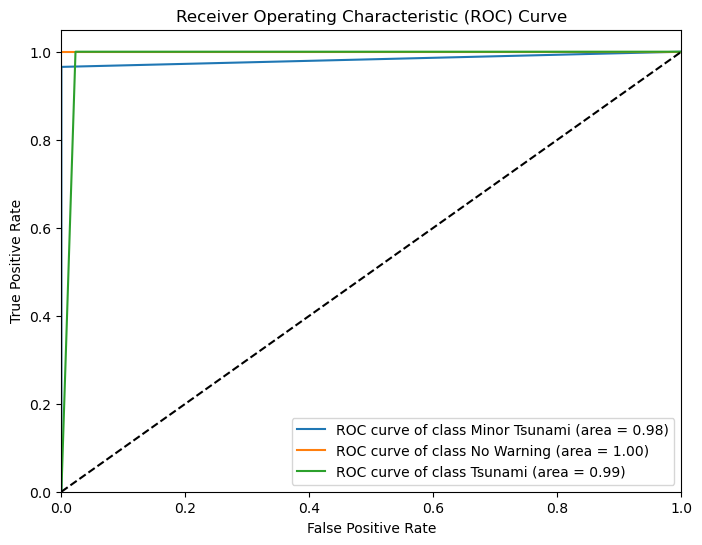

In [5]:
#5. ROC Curve dan AUC

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# ROC Curve dan AUC
y_test_bin = label_binarize(y_test, classes=clf.classes_)
n_classes = y_test_bin.shape[1]

y_score = clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {clf.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Simpan gambar
plt.savefig('Receiver Operating Characteristic (ROC) Curve.png')  # Menyimpan gambar dengan nama 'confusion_matrix.png'

plt.show()

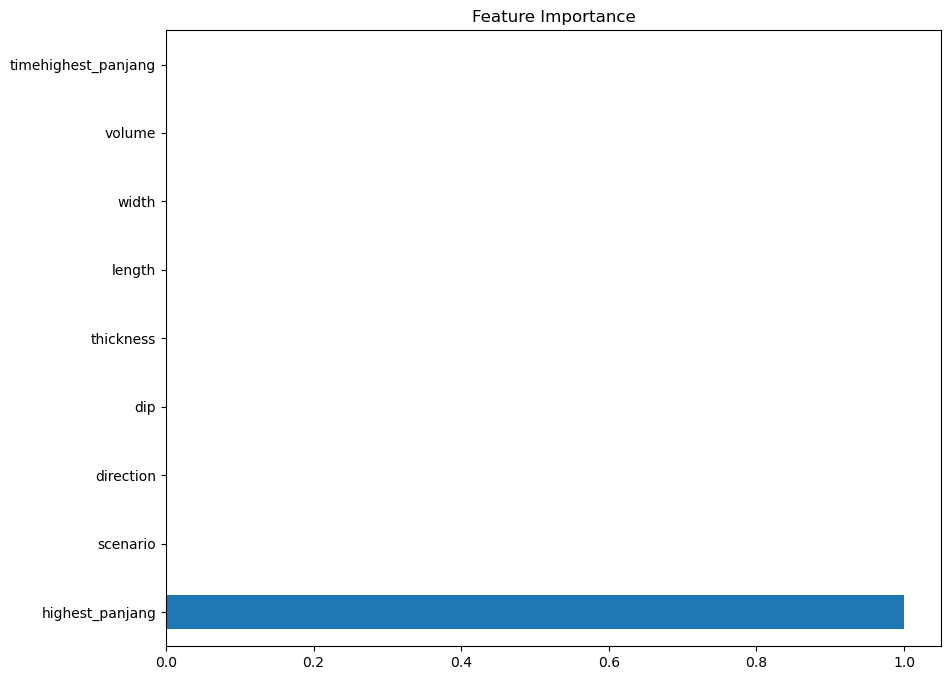

In [6]:
#6. Feature Importance

# Feature Importance
plt.figure(figsize=(10, 8))
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

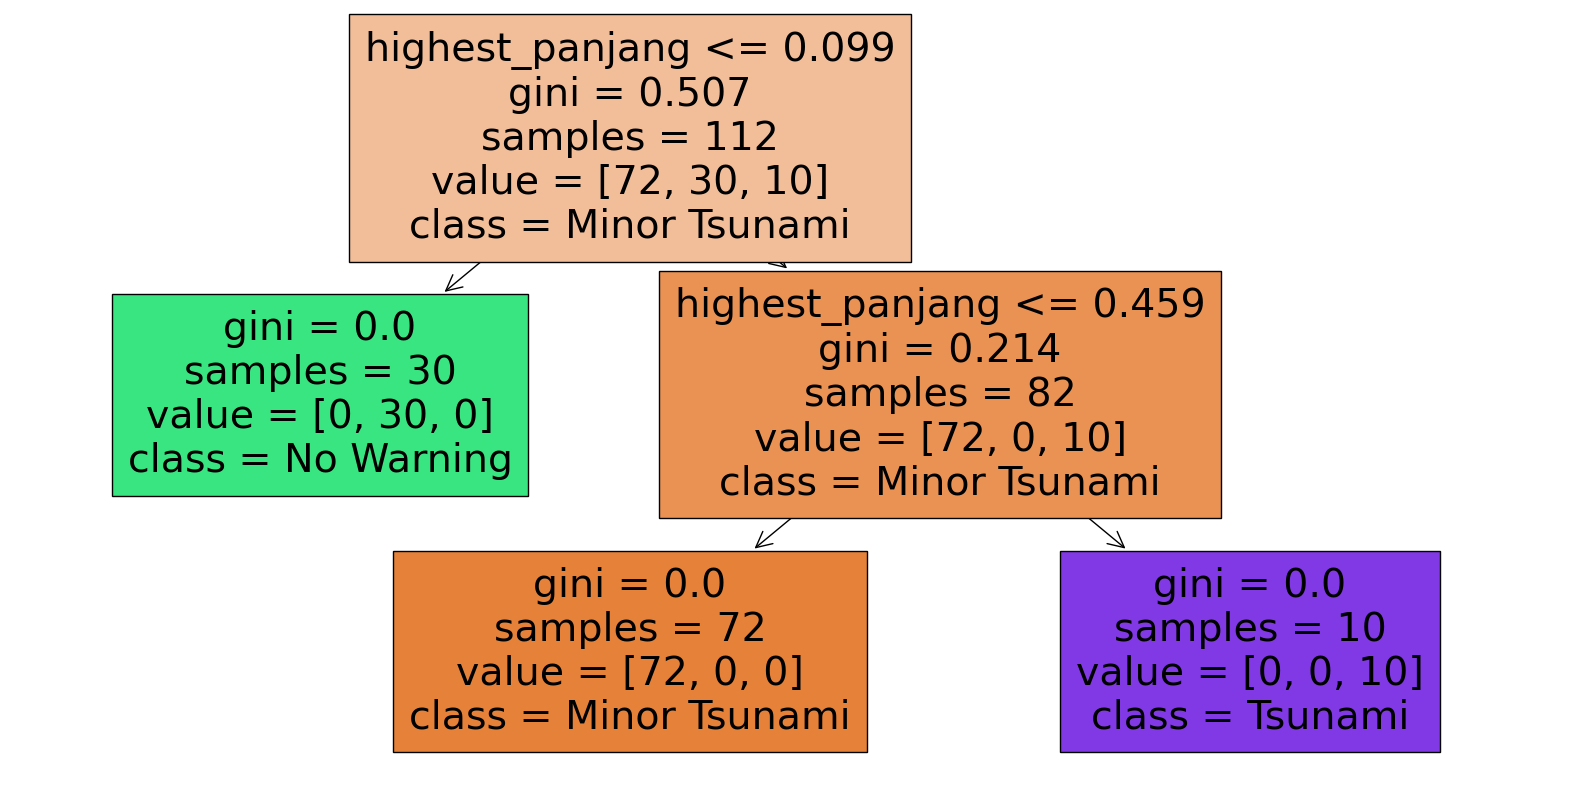

In [7]:
#7. Visualisasi Decision Tree

from sklearn.tree import plot_tree

# Plot decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=clf.classes_.tolist())

# Simpan gambar
plt.savefig('Decision Tree.png')  # Menyimpan gambar dengan nama 'confusion_matrix.png'

plt.show()